In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

file = open("BPE-data.txt", "r")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd drive/MyDrive/447_HW1/

In [ ]:
# 2D array: first layer is lines, second layer is tokens
def tokenization(lines, max, vocab):
  word_count = defaultdict(int)

  corpus = []
  num_line = 0
  for line in lines:
    if num_line > max - 1:
      break
    num_line += 1
    cleaned_line = line.strip()
    words = cleaned_line.split()

    chars = []
    for word in words:
      for char in word:
        chars.append(char)
        if char not in vocab:
          vocab.append(char)
      chars.append("<s>")
      if "<s>" not in vocab:
        vocab.append("<s>")
    chars.pop(len(chars) - 1)
    corpus.append(chars)

  return corpus

In [ ]:
def count_for_pair(data):
  pair_count = defaultdict(int)
  for line in data:
    for i in range(len(line) - 1):
      if line[i + 1][:3] != "<s>":
        pair_count[(line[i], line[i + 1])] = pair_count.get((line[i], line[i + 1]), 0) + 1
  return pair_count

In [ ]:
def find_max_freq(pair_count):
  max_pair = ""
  max_freq = -1

  for pair in pair_count:
    if max_freq < pair_count[pair]:
      max_freq = pair_count[pair]
      max_pair = pair
  return (max_pair, max_freq)

In [ ]:
def merge_token(vocab, corpus, pair):
  new_corpus = []
  vocab.append(pair[0]+pair[1])
  for line in corpus:
    i = 0
    new_line = []
    while i < len(line):
      if line[i] == pair[0] and (i + 1) < len(line) and line[i + 1] == pair[1]:
        new_line.append(line[i] + line[i + 1])
        i += 1
      else:
        new_line.append(line[i])
      i += 1
    new_corpus.append(new_line)
  return new_corpus


In [ ]:
def bpe_train(lines):
  vocab = []
  merges = []
  corpus = tokenization(lines, 4000, vocab)
  pair_count = count_for_pair(corpus)
  max_result = find_max_freq(pair_count)
  max_freq = max_result[1]
  max_pair = max_result[0]
  x = [len(vocab)]
  y = [sum(len(row) for row in corpus)]

  plt.xlim(0, 9500)
  plt.ylim(100, 550000)
  plt.xlabel("Size of Vocab")
  plt.ylabel("Number of Tokens")
  plt.title("Iteration of the BPE Algorithm")

  while max_freq > 2:
    corpus = merge_token(vocab, corpus, max_pair)
    merges.append(max_pair)
    x.append(len(vocab))
    y.append(sum(len(row) for row in corpus))
    pair_count = count_for_pair(corpus)
    max_result = find_max_freq(pair_count)
    max_freq = max_result[1]
    max_pair = max_result[0]
  plt.scatter(x, y, s=5)
  plt.show()
  print("vocabulary types ends up with: ", len(vocab))
  print("The length of the training data under my final type vocabulary is: ", sum(len(row) for row in corpus))
  return (corpus, vocab, merges)

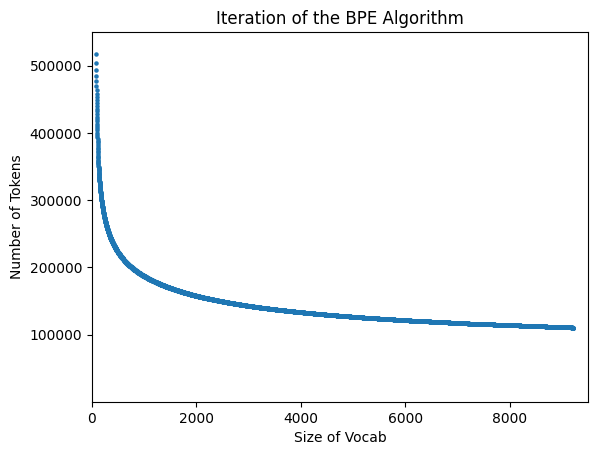

vocabulary types ends up with:  9219
The length of the training data under my final type vocabulary is:  110432
vocab size excluding base vocab:  9136


In [ ]:
f = file.readlines()
train = f[:4000]
apply = f[4000:]
train_result = bpe_train(train)
corpus_train = train_result[0]
vocab_train = train_result[1]
merges = train_result[2]
print("vocab size excluding base vocab: ", len(merges))

# 2.2 (b)
Advantage: Character-level encoding provides a straightforward solution to the rare word problem since characters are the fundamental units of natural language. By breaking out-of-vocabulary (OOV) words down into individual characters, all words can be represented without the need to consider their probability. This approach also offers greater flexibility in encoding, as it can represent a wider range of words compared to other encoding methods.

Potential issues: This encoding strategy poses significant challenges in model training, potentially leading to the generation of numerous meaningless tokens. Additionally, the encoding process may result in the loss of sentence structure, potentially distorting the model's understanding of language.

In [ ]:
def bpe_apply(lines, merges):
  new_vocab = []
  corpus = tokenization(lines, 1000, new_vocab)
  for pair in merges:
    corpus = merge_token(new_vocab, corpus, pair)
  print("After apply the merge rule: ", sum(len(row) for row in corpus))
  return (corpus, new_vocab)

In [ ]:
apply_result = bpe_apply(apply, merges)
corpus_apply = apply_result[0]
vocab_apply = apply_result[1]

After apply the merge rule:  30007


# 2.2 (c)
When my model encounters out-of-vocabulary (OOV) or extremely rare words, it may fail to effectively tokenize them. This failure could result in the tokenizer's vocabulary ultimately containing only a single character token, which signifies the unsuccessful handling of these cases.